# Figure avec deux axes différents sur x

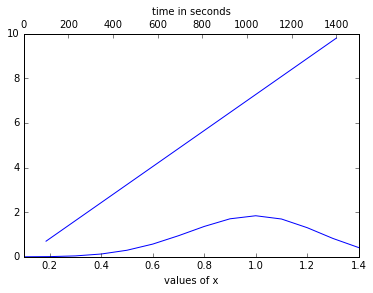

In [34]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
k=5
# ___________________
# figure
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny() # partage de l’axe y :
# ___________________
# fonction 1 
# x est un tableau de 15 valeurs :
# puis on calcule 15 y pour chacun des 15 x
x1 = np.arange(0.1, 1.5, 0.1)         
y1 = k*(np.power(x1,(k-1))) * np.exp(-(np.power(x1,(k-1))))    

ax1.set_xlabel(r"values of x") # titre sur l’axe des x       
ax1.set_xlim(0.1,1.4) # on met une limite de x pour le premier axe 
ax1.plot(x1,y1)       # dessiner la première fonction 
# ___________________
# fonction 2 
x2 = x1*1000
y2 = x1*7
ax2.set_xlabel(r"time in seconds")
ax2.set_xlim(1500)   # on change le x sur le second axe
ax2.invert_xaxis()   # inversion de l’axe x (pourquoi ?)
ax2.plot(x2,y2)      # fonction linéaire : x => 7x
# ___________________
plt.show()


# lister les csvs

In [32]:
def get_all_specific_paths_under_dir(directory_path, wanted_end = ".csv"):
    """
    Recursevely walk a directory and create an array of path leading to a csv file.
        Parameter:
            directory:string
                Path to the root directory to walk through.
            wanted_ends:string
                Ending we are looking for into the filename. (ie: '.csv' for csv files)
                Default = ".csv" (ie returning list of csv files)int
        Return: array
            Array of paths (csv as defaults).
    """
    import os
    files_paths = []
    for dirname, dirnames, filenames in os.walk(directory_path) :
        for filename in filenames:
            if filename.endswith(wanted_end): 
                files_paths.append(os.path.join(dirname, filename))
    return files_paths

In [33]:
get_all_specific_paths_under_dir(".")

['./cyclistes.csv']

In [21]:
path_to_cyclistes = "./cyclistes.csv"

# Analsyer l'output de la création des cyclistes

In [20]:
import pandas as pd

In [22]:
df = pd.DataFrame.from_csv(path_to_cyclistes)

## Groupes par sexe

15
     sexe  sportivite  age sur_velo
id                                 
226     H    3.389193   15     True
442     H    3.861592   15    False
743     H    0.886540   15     True
837     H    3.555805   15     True
958     H    3.643358   15     True
1022    H    1.498227   15    False


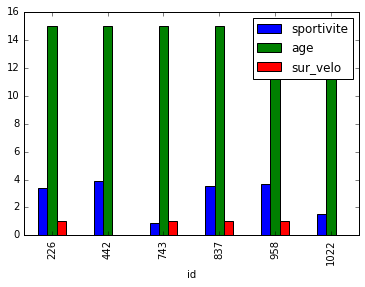

In [23]:
# (1) masque sur le sexe
mask    = df["sexe"] == "H"
# (2) groupement par âge
groupes = df[mask].groupby(["age"])
# (3) observations par groupe : 
for valeur_de_groupement, groupe in groupes:
    print valeur_de_groupement
    print groupe
    groupe.plot(kind='bar')
    break


## Création d'une pyramide des âges

### Préparation

In [35]:
mask      = df["sexe"] == "H"
hommes    = df[mask]
nb_hommes = hommes.groupby("age").count()

In [36]:
mask      = df["sexe"] == "F"
femmes    = df[mask]
nb_femmes = femmes.groupby("age").count()

In [37]:
hommes_femmes = nb_hommes.join(nb_femmes, 
                               lsuffix="_homme", 
                               rsuffix="_femme")[["sexe_homme", "sexe_femme"]]

In [38]:
hommes_femmes.head()

,sexe_homme,sexe_femme
age,,
15,6,4
16,9,5
17,6,6
18,8,7
19,7,15


In [39]:
de_0_a_100_ans = hommes_femmes.reindex(index=range(100))

In [40]:
de_0_a_100_ans.head()

,sexe_homme,sexe_femme
age,,
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


### Pyramide des âges

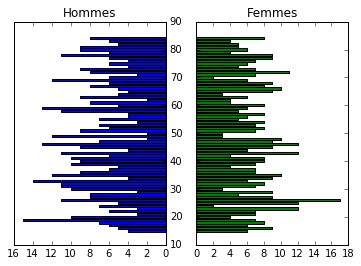

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

y  = range(100)
x1 = de_0_a_100_ans["sexe_femme"]
x2 = de_0_a_100_ans["sexe_homme"]

fig, axes = plt.subplots(ncols=2, sharey=True)

axes[0].set(title='Hommes')
axes[1].set(title='Femmes')

axes[0].barh(y, x1, align='center', color='blue')
axes[1].barh(y, x2, align='center', color='green')

axes[0].invert_xaxis()
axes[0].yaxis.tick_right()

plt.show()